<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:120%;
           letter-spacing:0.5px">
​
<h1 style="padding: 10px;
              color:black;"> Breast Cancer Prediction using Machine Learning
    
</h1>
</div>
    
</center>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:100%;
           letter-spacing:0.5px">
​
<h3 style="padding: 10px;
              color:black;"> Breast Cancer Wisconsin (Diagnostic) Data Set
 
    
</h3>
</div>
    
</center>


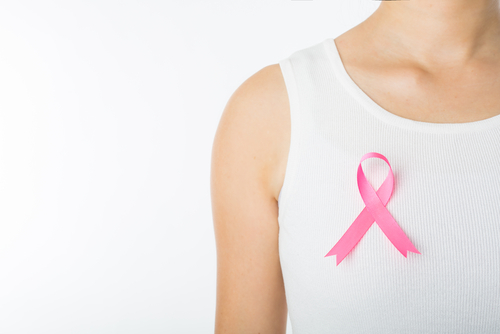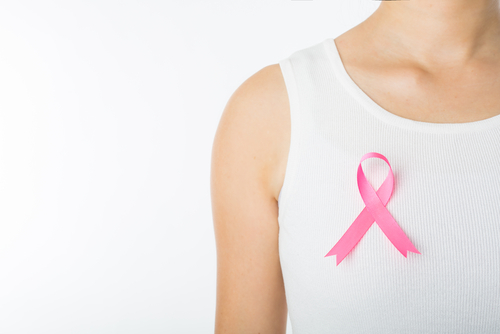



Breast cancer is one of the most common forms of cancer among women worldwide, and early detection plays a crucial role in its successful treatment. With the advancements in technology, machine learning algorithms have emerged as promising tools for the early detection and prediction of breast cancer. In this Jupyter Notebook project, we aim to build a breast cancer prediction model using a publicly available breast cancer dataset. We will explore the dataset, preprocess the data, perform feature selection, and apply various classification algorithms to build a robust model that can accurately predict the presence of breast cancer. Through this project, we hope to contribute towards improving the early detection and treatment of breast cancer and pave the way for further research in this field.

## Problem Statement

In this project, based on the data we are going to find out if the cancer is **benign** or **malignant**. We'd use different Machine Learning algorightms techniques which would help to develop a model building with high accuracy. 

> **QUESTION**: Hospital of Nottingham offers medical facilities to thousands of patients all over the city. As the lead data scientist at the hospital, **you're tasked with creating an automated system to detect if the cancer is malign or benignant**, using information such as their mean radius, mean compactness, worst area etc. 
>
> Classification from your system will be used to determine if the patient should be operated or not. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> Below is what the data looks like and you are given a CSV file to make the predictions
>
> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgXNxLPAru6FyxUKOPTXNUbu7Vu16dfVYZXA&usqp=CAU" width="480">
>
>
> Dataset source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #00203FFF;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Importing Libraries
    
</h2>
</div>

In [120]:
# Basic Environment
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [121]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')


In [122]:
# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #00203FFF;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Loading the data
    
</h2>
</div>

The dataset contains information about various features of breast mass cells, such as their radius, texture, smoothness, symmetry, and fractal dimension, among others. It also contains the diagnosis of the cells as either malignant (M) or benign (B). The goal of this project is to build a machine learning model to predict the diagnosis of new breast mass cells based on their features.


In [4]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv', index_col='id')
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [123]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## **Understanding the data**


The dataset contains information about various features of breast mass cells, such as their radius, texture, smoothness, symmetry, and fractal dimension, among others. The columns in the dataset are:

> **diagnosis**: The diagnosis of the breast mass cells as either malignant (M) or benign (B).<br>
**radius_mean**: The mean radius of the breast mass cells.<br>
**texture_mean**: The mean texture (standard deviation of gray-scale values) of the breast mass cells.<br>
**perimeter_mean**: The mean perimeter of the breast mass cells.<br>
**area_mean**: The mean area of the breast mass cells.<br>
**smoothness_mean**: The mean smoothness (local variation in radius lengths) of the breast mass cells.<br>
**compactness_mean**: The mean compactness (perimeter^2 / area - 1.0) of the breast mass cells.<br>
**concavity_mean**: The mean concavity (severity of concave portions of the contour) of the breast mass cells.<br>
**concave points_mean**: The mean number of concave portions of the contour of the breast mass cells.<br>
**symmetry_mean**: The mean symmetry of the breast mass cells.<br>
**fractal_dimension_mean**: The mean fractal dimension (coastline approximation - 1) of the breast mass cells.<br>
**radius_se**: The standard error of the radius of the breast mass cells.<br>
**texture_se**: The standard error of the texture (standard deviation of gray-scale values) of the breast mass cells.<br>
**perimeter_se**: The standard error of the perimeter of the breast mass cells.<br>
**area_se**: The standard error of the area of the breast mass cells.<br>
**smoothness_se**: The standard error of the smoothness (local variation in radius lengths) of the breast mass cells.<br>
**compactness_se**: The standard error of the compactness (perimeter^2 / area - 1.0) of the breast mass cells.<br>
**concavity_se**: The standard error of the concavity (severity of concave portions of the contour) of the breast mass cells.<br>
**concave points_se**: The standard error of the number of concave portions of the contour of the breast mass cells.<br>
**symmetry_se**: The standard error of the symmetry of the breast mass cells.<br>
**fractal_dimension_se**: The standard error of the fractal dimension (coastline approximation - 1) of the breast mass cells.<br>
**radius_worst**: The worst (largest) radius of the breast mass cells.<br>
**texture_worst**: The worst (highest standard deviation) texture of the breast mass cells.<br>
**perimeter_worst**: The worst (largest) perimeter of the breast mass cells.<br>
**area_worst**: The worst (largest) area of the breast mass cells.<br>
**smoothness_worst**: The worst (lowest) smoothness (local variation in radius lengths) of the breast mass cells.<br>
**compactness_worst**: The worst (largest) compactness (perimeter^2 / area - 1.0) of the breast mass cells.<br>
**concavity_worst**: The worst (largest) concavity (severity of concave portions of the contour) of the breast mass cells.<br>
**concave points_worst**: The worst (largest) number of concave portions of the contour of the breast mass cells.<br>
**symmetry_worst**: The worst (largest) symmetry of the breast mass cells.<br>
> **fractal_dimension_worst**: The worst (largest) fractal dimension (coastline approximation - 1) of the breast mass cells.

We have to perform feature engineer to define which features have more predictive power for the models.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #00203FFF;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Exploratory Data Analysis EDA
    
</h2>
</div>

The shape of the data is (569, 32), which means that the dataset contains 569 rows (or observations) and 32 columns (or features). Each row represents a unique case of a breast cancer diagnosis, while the columns represent various features that describe the characteristics of the tumors. 

Having 569 observations is a decent sample size for statistical analysis and machine learning algorithms. It provides enough data to potentially discover patterns and relationships between the different features and the target variable.






In [5]:
df.shape

(569, 32)

This is a description of a Pandas DataFrame. It has 569 rows and 31 columns. The first column is 'diagnosis' which is an integer type with 569 non-null values. The other 30 columns are float types with 569 non-null values each. The column names indicate different features related to breast cancer such as 'radius_mean', 'texture_mean', 'area_worst', 'smoothness_worst' and so on. This means that each row in the DataFrame represents a patient and each column represents a particular measurement or feature associated with their breast cancer diagnosis. 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

The following table displays the statistical summary for 30 features of the breast cancer dataset, divided into three groups based on their names: mean, standard error (SE), and worst. Each feature has 569 values (samples), and the table shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for each feature.

In [8]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Based on the statistics, here are some interesting insights that can be inferred:

* The **mean radius, texture, perimeter, area, and smoothness of the cell nuclei** appear to be important features for differentiating between benign and malignant tumors.
* The standard deviation of the **texture and concave points** of the cell nuclei are also important features for predicting the diagnosis.
* The maximum and mean values of the **concavity and compactness** of the cell nuclei show a large difference between malignant and benign tumors, making them useful features for classification.




<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;"> Data Cleaning
    
</h3>
</div>

    


As expected, there are not missing values in the dataset.

In [6]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

Dropping the unnecesary column:

In [7]:
df = df.drop('Unnamed: 32', axis=1)

## **Handling Categorical Variables**

The following snippet maps the value 'M' to 1 (representing 'Malignant') and 'B' to 0 (representing 'Benign') using a Python dictionary, and assigns the mapped values back to the 'diagnosis' column. This is useful because many machine learning models require numerical inputs, so mapping categorical values to numerical values makes it easier to use these models.

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) #Malign: 1, Benign: 0
df.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                        
926424          1        21.56         22.39          142.00     1479.0   
926682          1        20.13         28.25          131.20     1261.0   
926954          1        16.60         28.08          108.30      858.1   
927241          1        20.60         29.33          140.10     1265.0   
92751           0         7.76         24.54           47.92      181.0   

        smoothness_mean  compactness_mean  concavity_mean  \
id                                                          
926424          0.11100           0.11590         0.24390   
926682          0.09780           0.10340         0.14400   
926954          0.08455           0.10230         0.09251   
927241          0.11780           0.27700         0.35140   
92751           0.05263           0.04362         0.00000   

        concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
id                                          ...                                
926424              0.13890         0.1726  ...        25.450          26.40   
926682              0.09791         0.1752  ...        23.690          38.25   
926954              0.05302         0.1590  ...        18.980          34.12   
927241              0.15200         0.2397  ...        25.740          39.42   
92751               0.00000         0.1587  ...         9.456          30.37   

        perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                         
926424           166.10      2027.0           0.14100            0.21130   
926682           155.00      1731.0           0.11660            0.19220   
926954           126.70      1124.0           0.11390            0.30940   
927241           184.60      1821.0           0.16500            0.86810   
92751             59.16       268.6           0.08996            0.06444   

        concavity_worst  concave points_worst  symmetry_worst  \
id                                                              
926424           0.4107                0.2216          0.2060   
926682           0.3215                0.1628          0.2572   
926954           0.3403                0.1418          0.2218   
927241           0.9387                0.2650          0.4087   
92751            0.0000                0.0000          0.2871   

        fractal_dimension_worst  
id                               
926424                  0.07115  
926682                  0.06637  
926954                  0.07820  
927241                  0.12400  
92751                   0.07039  

[5 rows x 31 columns]

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #00203FFF;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Visualization of the data
    
</h2>
</div>

In the context of analyzing breast cancer data, visualization plays a crucial role in providing insights and understanding patterns in the data. By using various visualization techniques, such as scatter plots, histograms, and box plots, we can gain a better understanding of the distribution of features, identify potential outliers or anomalies, and uncover relationships between variables. Moreover, visualizing the data can help us communicate our findings more effectively to others, such as medical professionals or stakeholders, and aid in the decision-making process. 

let's start by examining how many cases of malignant and benign tumours we have: 

## **Number of tumour cases**

Text(0.5, 1.0, 'Benign vs Malign Tumors Count')

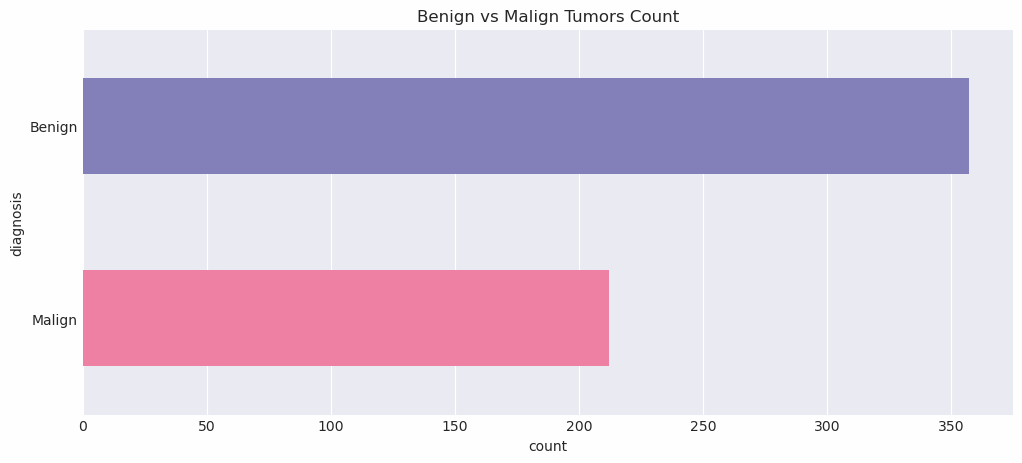

In [11]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, y="diagnosis", saturation=0.75, width=0.5)
ax.set_yticklabels(['Benign', 'Malign'])
plt.title('Benign vs Malign Tumors Count')



<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> Investigating differences
    
</h3>
</div>


We have to analyze the disparities or variations between different groups, categories, or variables in the dataset. Visualizing these differences through graphs, charts, and other means can help identify patterns, outliers, and potential relationships that may not be apparent from just looking at the raw data. By understanding these differences, researchers can gain insights into the factors that may be contributing to them, and use this information to make more informed decisions or draw more accurate conclusions.

#### **a) Radius mean**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


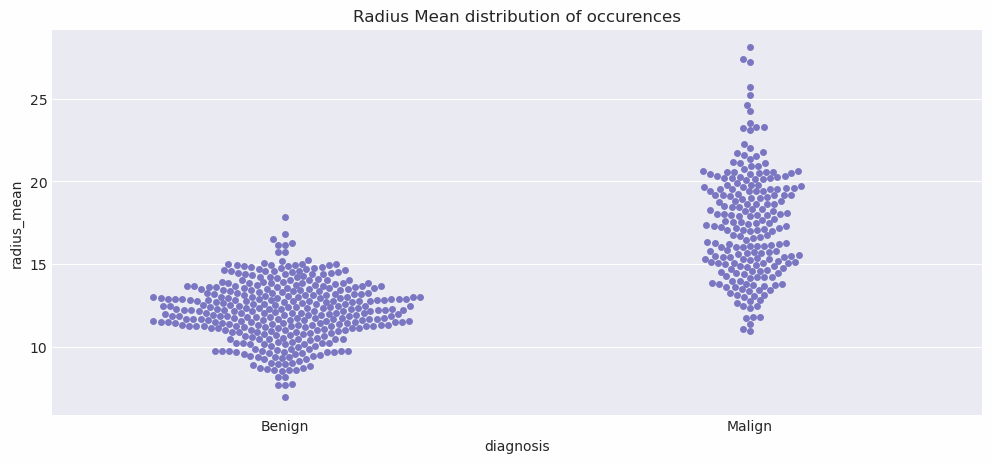

In [12]:
plt.figure(figsize=(12,5))
ax = sns.swarmplot(x='diagnosis', y='radius_mean', data=df)
ax.set_xticklabels(['Benign', 'Malign'])
plt.title('Radius Mean distribution of occurences')
plt.show()

Based on the plot, the mean radius of malignant tumors appears to be higher than that of benign tumors. The median radius of malignant tumors is also higher than that of benign tumors, indicating that the difference in radius mean is consistent throughout the dataset. This observation is further supported by the statistical summary of the radius mean values, where the mean and median values for malignant tumors are higher than those for benign tumors.

#### **b) Texture mean**

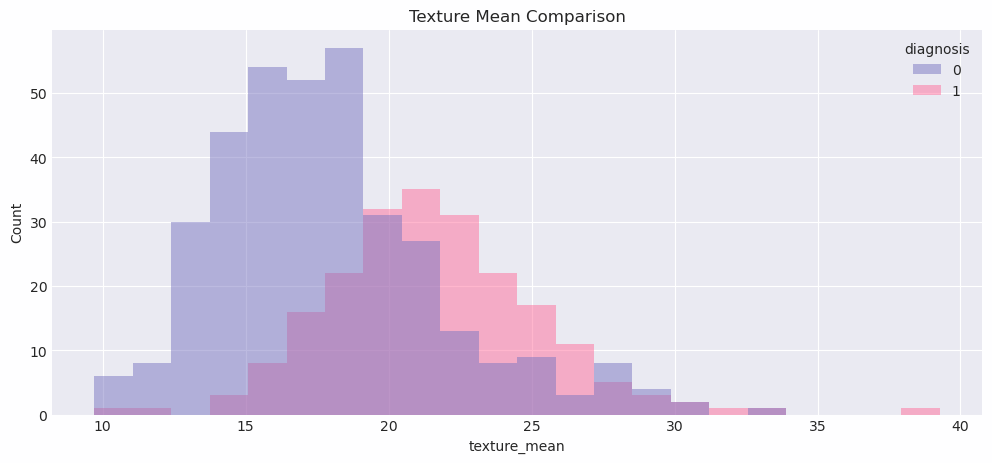

In [119]:
# Histograms for benign and maligant tumors
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='texture_mean', hue='diagnosis', edgecolor=None)
plt.title('Texture Mean Comparison')
plt.show()

The comparison of the "texture_mean" feature between the two classes of tumors shows a similar pattern to the previous graph on "mean radius". The distributions of the feature values for the two classes overlap to a large extent, making it difficult to distinguish between the benign and malignant tumors based on this feature alone. 

However, it is observed that the malignant tumors tend to have a slightly higher mean value for "texture_mean" compared to the benign tumors. 
> This suggests that the texture of the cells in malignant tumors may be more irregular or rough compared to the texture of cells in benign tumors. Again, this observation needs to be confirmed by further analysis and experimentation.

#### **C) Area mean**

Text(0.5, 1.0, 'Area_Mean')

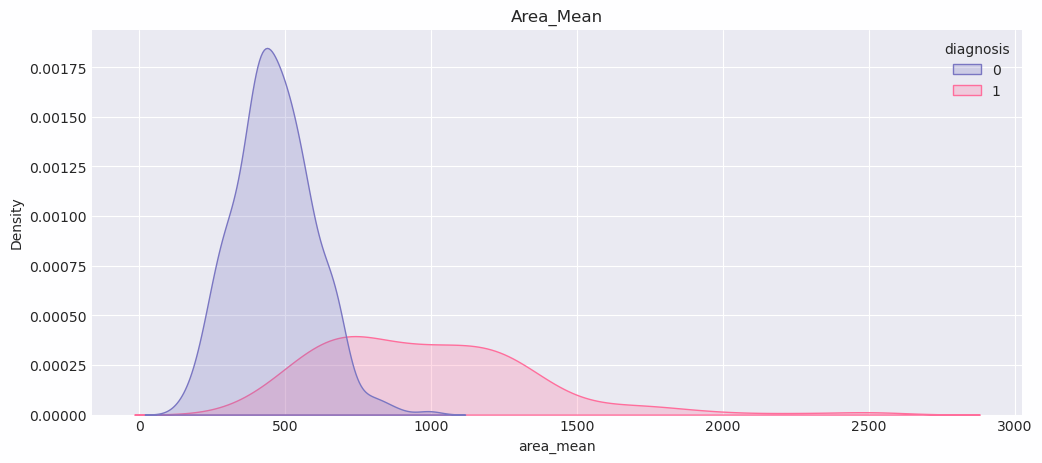

In [14]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df, x='area_mean', hue='diagnosis', fill=True)
plt.title('Area_Mean')

The "area mean" feature is another important characteristic in determining the nature of the tumor. The results from the kdeplot show that benign tumors have a higher area mean compared to malignant tumors. The kdeplot shows a clear distinction between the density distributions of both tumor types. Benign tumors have a peak density around 0.00175, while malignant tumors have a flatter density distribution around 0.00030. 
> This indicates that *tumors with higher area mean values are more likely to be benign*, while **tumors with lower area mean values are more likely to be malignant**. This information can be used as a valuable diagnostic tool to help doctors determine the nature of a tumor and develop a treatment plan accordingly.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: gray;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;"> Generalization of the data
    
</h3>
</div>


The previous graphs show that for many of the features, the distribution of values is slightly shifted towards higher values for malignant tumors compared to benign tumors. Some examples of features that exhibit this trend include 'radius_mean', 'area_mean','radius_worst', etc. However, it's worth noting that there are also features for which the distribution of values is not as clearly separated between malignant and benign tumors, such as 'symmetry_mean' and 'texture_worst'.

However, *in most scenarios it is observed that malignant tumours tend to have a similar skewed behaviour compared to benign tumours*. 

The graphs below are intended to demonstrate this.

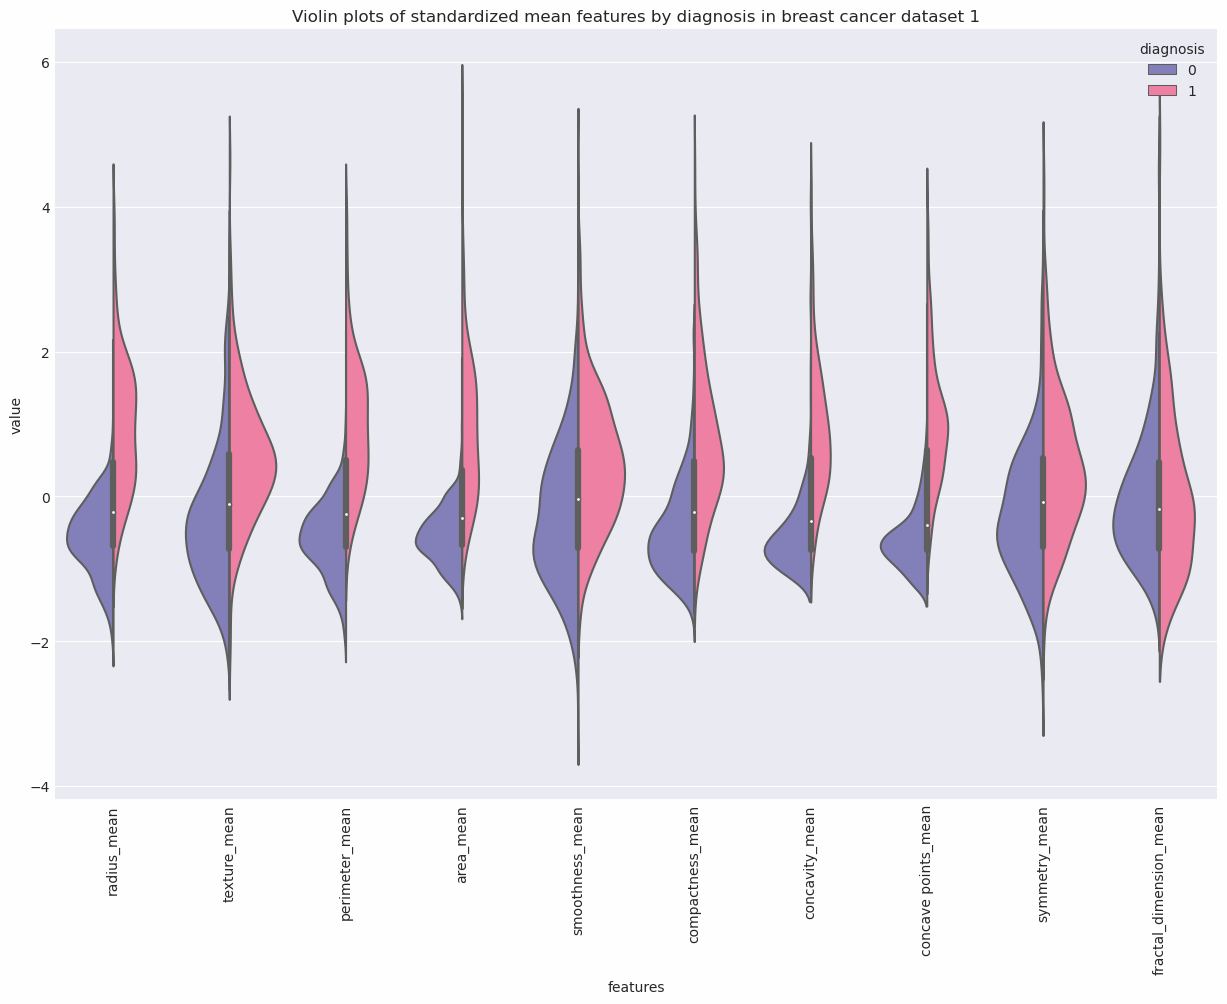

In [15]:
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

# Select the relevant columns to plot
cols_to_plot = X.iloc[:,0:10].columns
# Create a new dataframe with the selected columns and the diagnosis column
data = pd.concat([df["diagnosis"], df[cols_to_plot]], axis=1)

# Standardize the data
scaler = StandardScaler()
data[cols_to_plot] = scaler.fit_transform(data[cols_to_plot])

# Reshape the data using melt
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

# Create the violinplot
plt.figure(figsize=(15, 10))
sns.violinplot(data=data, x="features", y="value", hue="diagnosis", split=True)
plt.xticks(rotation=90)
plt.title('Violin plots of standardized mean features by diagnosis in breast cancer dataset 1')
plt.show()

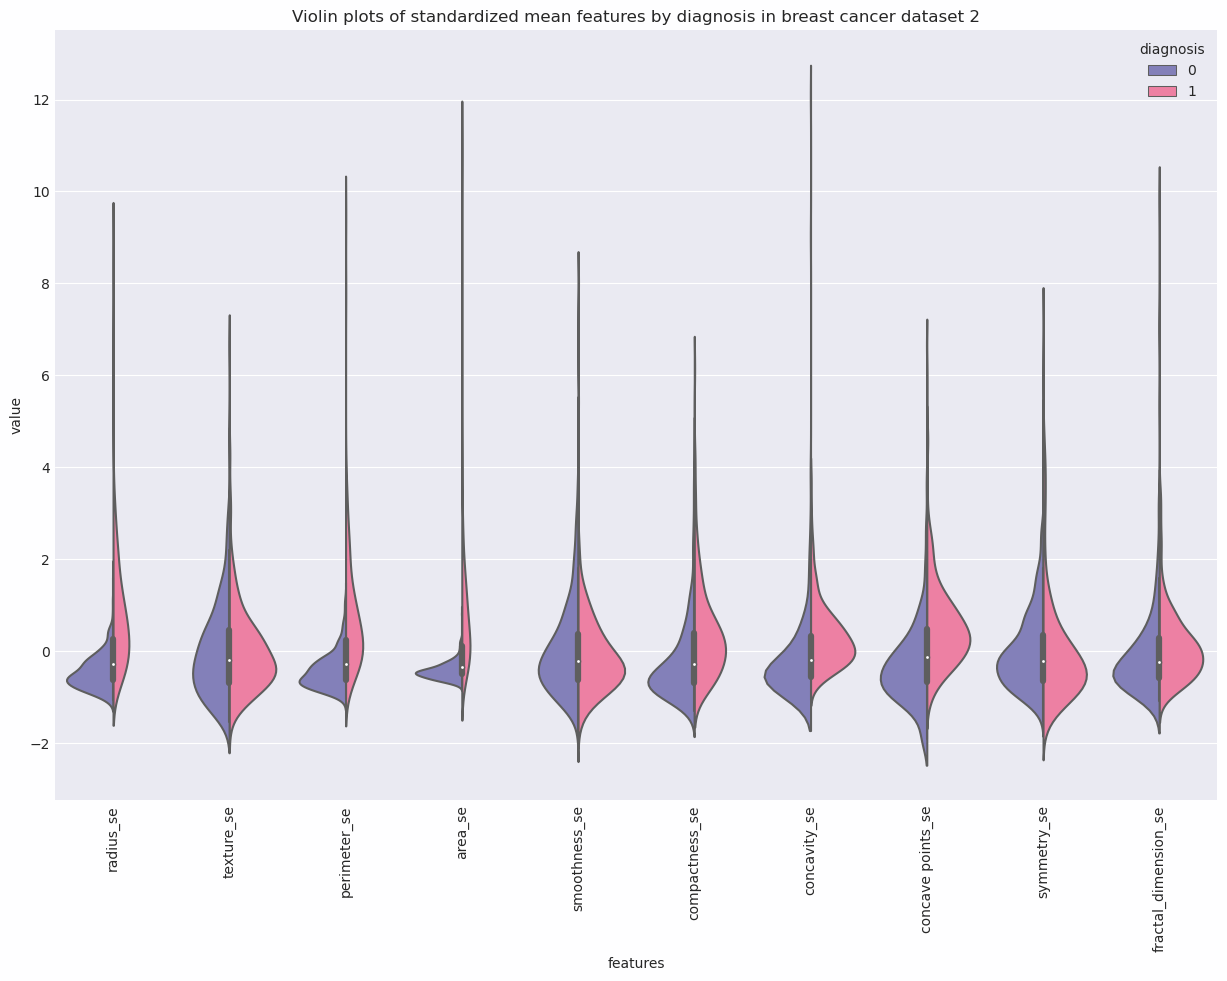

In [16]:
# Select the relevant columns to plot
cols_to_plot = X.iloc[:,10:20].columns
# Create a new dataframe with the selected columns and the diagnosis column
data = pd.concat([df["diagnosis"], df[cols_to_plot]], axis=1)

# Standardize the data
scaler = StandardScaler()
data[cols_to_plot] = scaler.fit_transform(data[cols_to_plot])

# Reshape the data using melt
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

# Create the violinplot
plt.figure(figsize=(15, 10))
sns.violinplot(data=data, x="features", y="value", hue="diagnosis", split=True)
plt.xticks(rotation=90)
plt.title('Violin plots of standardized mean features by diagnosis in breast cancer dataset 2')
plt.show()

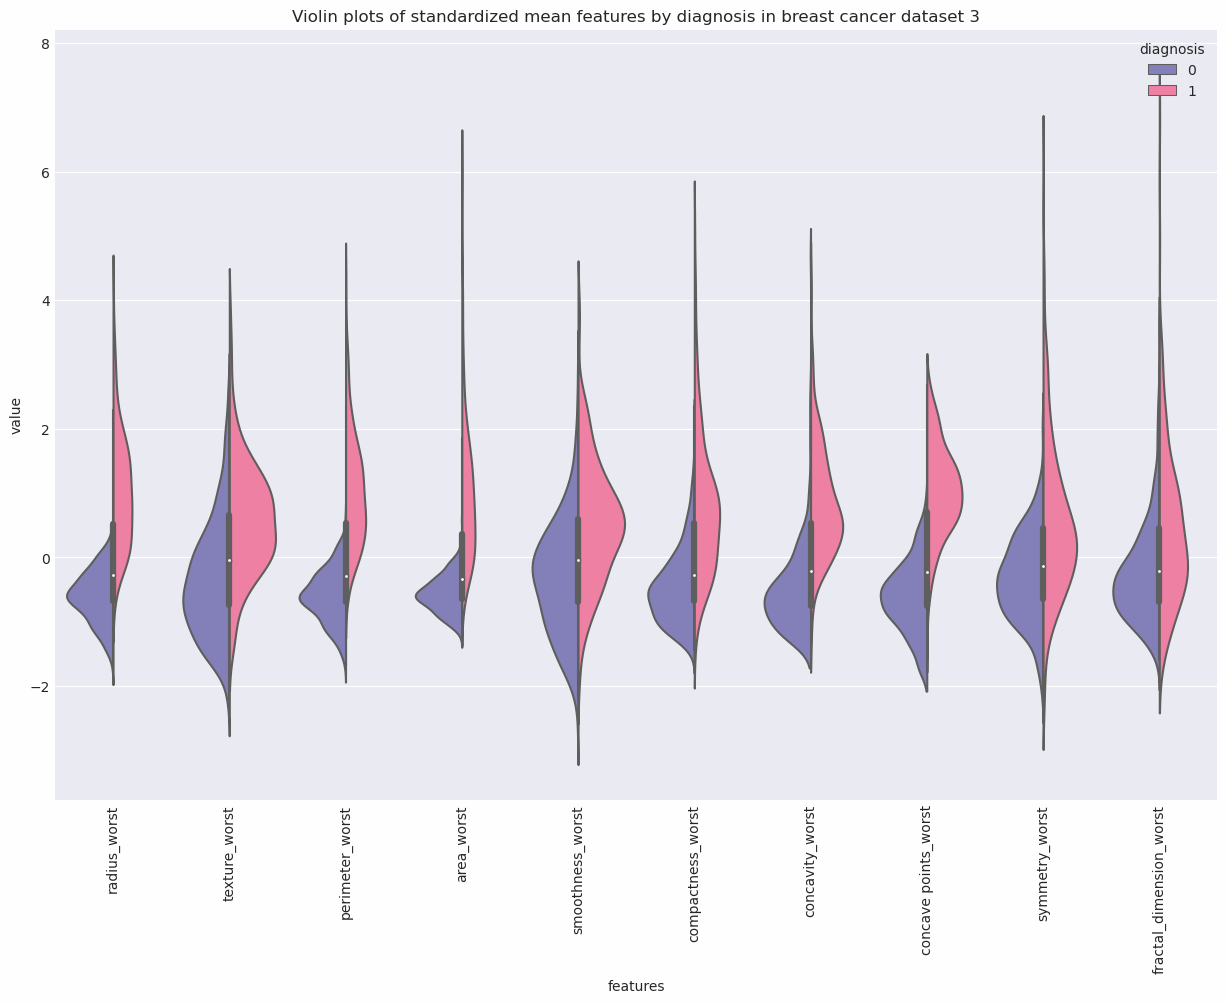

In [17]:
# Select the relevant columns to plot
cols_to_plot = X.iloc[:,20:30].columns
# Create a new dataframe with the selected columns and the diagnosis column
data = pd.concat([df["diagnosis"], df[cols_to_plot]], axis=1)

# Standardize the data
scaler = StandardScaler()
data[cols_to_plot] = scaler.fit_transform(data[cols_to_plot])

# Reshape the data using melt
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

# Create the violinplot
plt.figure(figsize=(15, 10))
sns.violinplot(data=data, x="features", y="value", hue="diagnosis", split=True)
plt.xticks(rotation=90)
plt.title('Violin plots of standardized mean features by diagnosis in breast cancer dataset 3')
plt.show()

Overall, the graphs show that there are significant differences between the mean values of various features in malignant and benign tumors. **Malignant tumors tend to have higher mean values for features such as radius, texture, perimeter, and area**, while benign tumors have higher mean values for features such as smoothness and compactness. These differences can be visualized clearly using various types of plots, including the histplots, violin plots, and kdeplots. 

These visualizations provide a useful tool for analyzing and comparing the characteristics of different types of tumors, and can help in the diagnosis and treatment of cancer.


> Overall, these findings suggest that the **features that exhibit a clear separation between malignant and benign tumors could be useful in predicting tumor malignancy**, while the features that do not exhibit such a separation may be less informative. <br> It's important to note, however, that these insights are based solely on the visualization of the data and more rigorous statistical analysis would be required to confirm these observations and assess the predictive power of these features.






<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Feature Selection
    
</h2>
</div>

    


Feature selection is a critical step in any machine learning problem, and it plays an essential role in the success of the model. In this problem of breast cancer diagnosis, **selecting the most relevant features can improve the performance** of the model and reduce the computational cost. The visualizations showed that some features have significant differences between benign and malignant tumors, while others do not. Therefore, selecting only the most important features can lead to better classification accuracy, reduce overfitting, and save time and resources. 



### **a) Using Correlation**
Correlation is a statistical measure that quantifies the relationship between two variables. In feature selection, we use correlation to identify informative features that are highly correlated with the target variable, and to detect highly correlated features that can lead to overfitting. To do this, we calculate the correlation coefficient between each feature and the target variable, and the correlation matrix between all pairs of features. We retain features with high correlation coefficients and remove highly correlated features to improve model performance.

Text(0.5, 1.0, 'Correlation among variables')

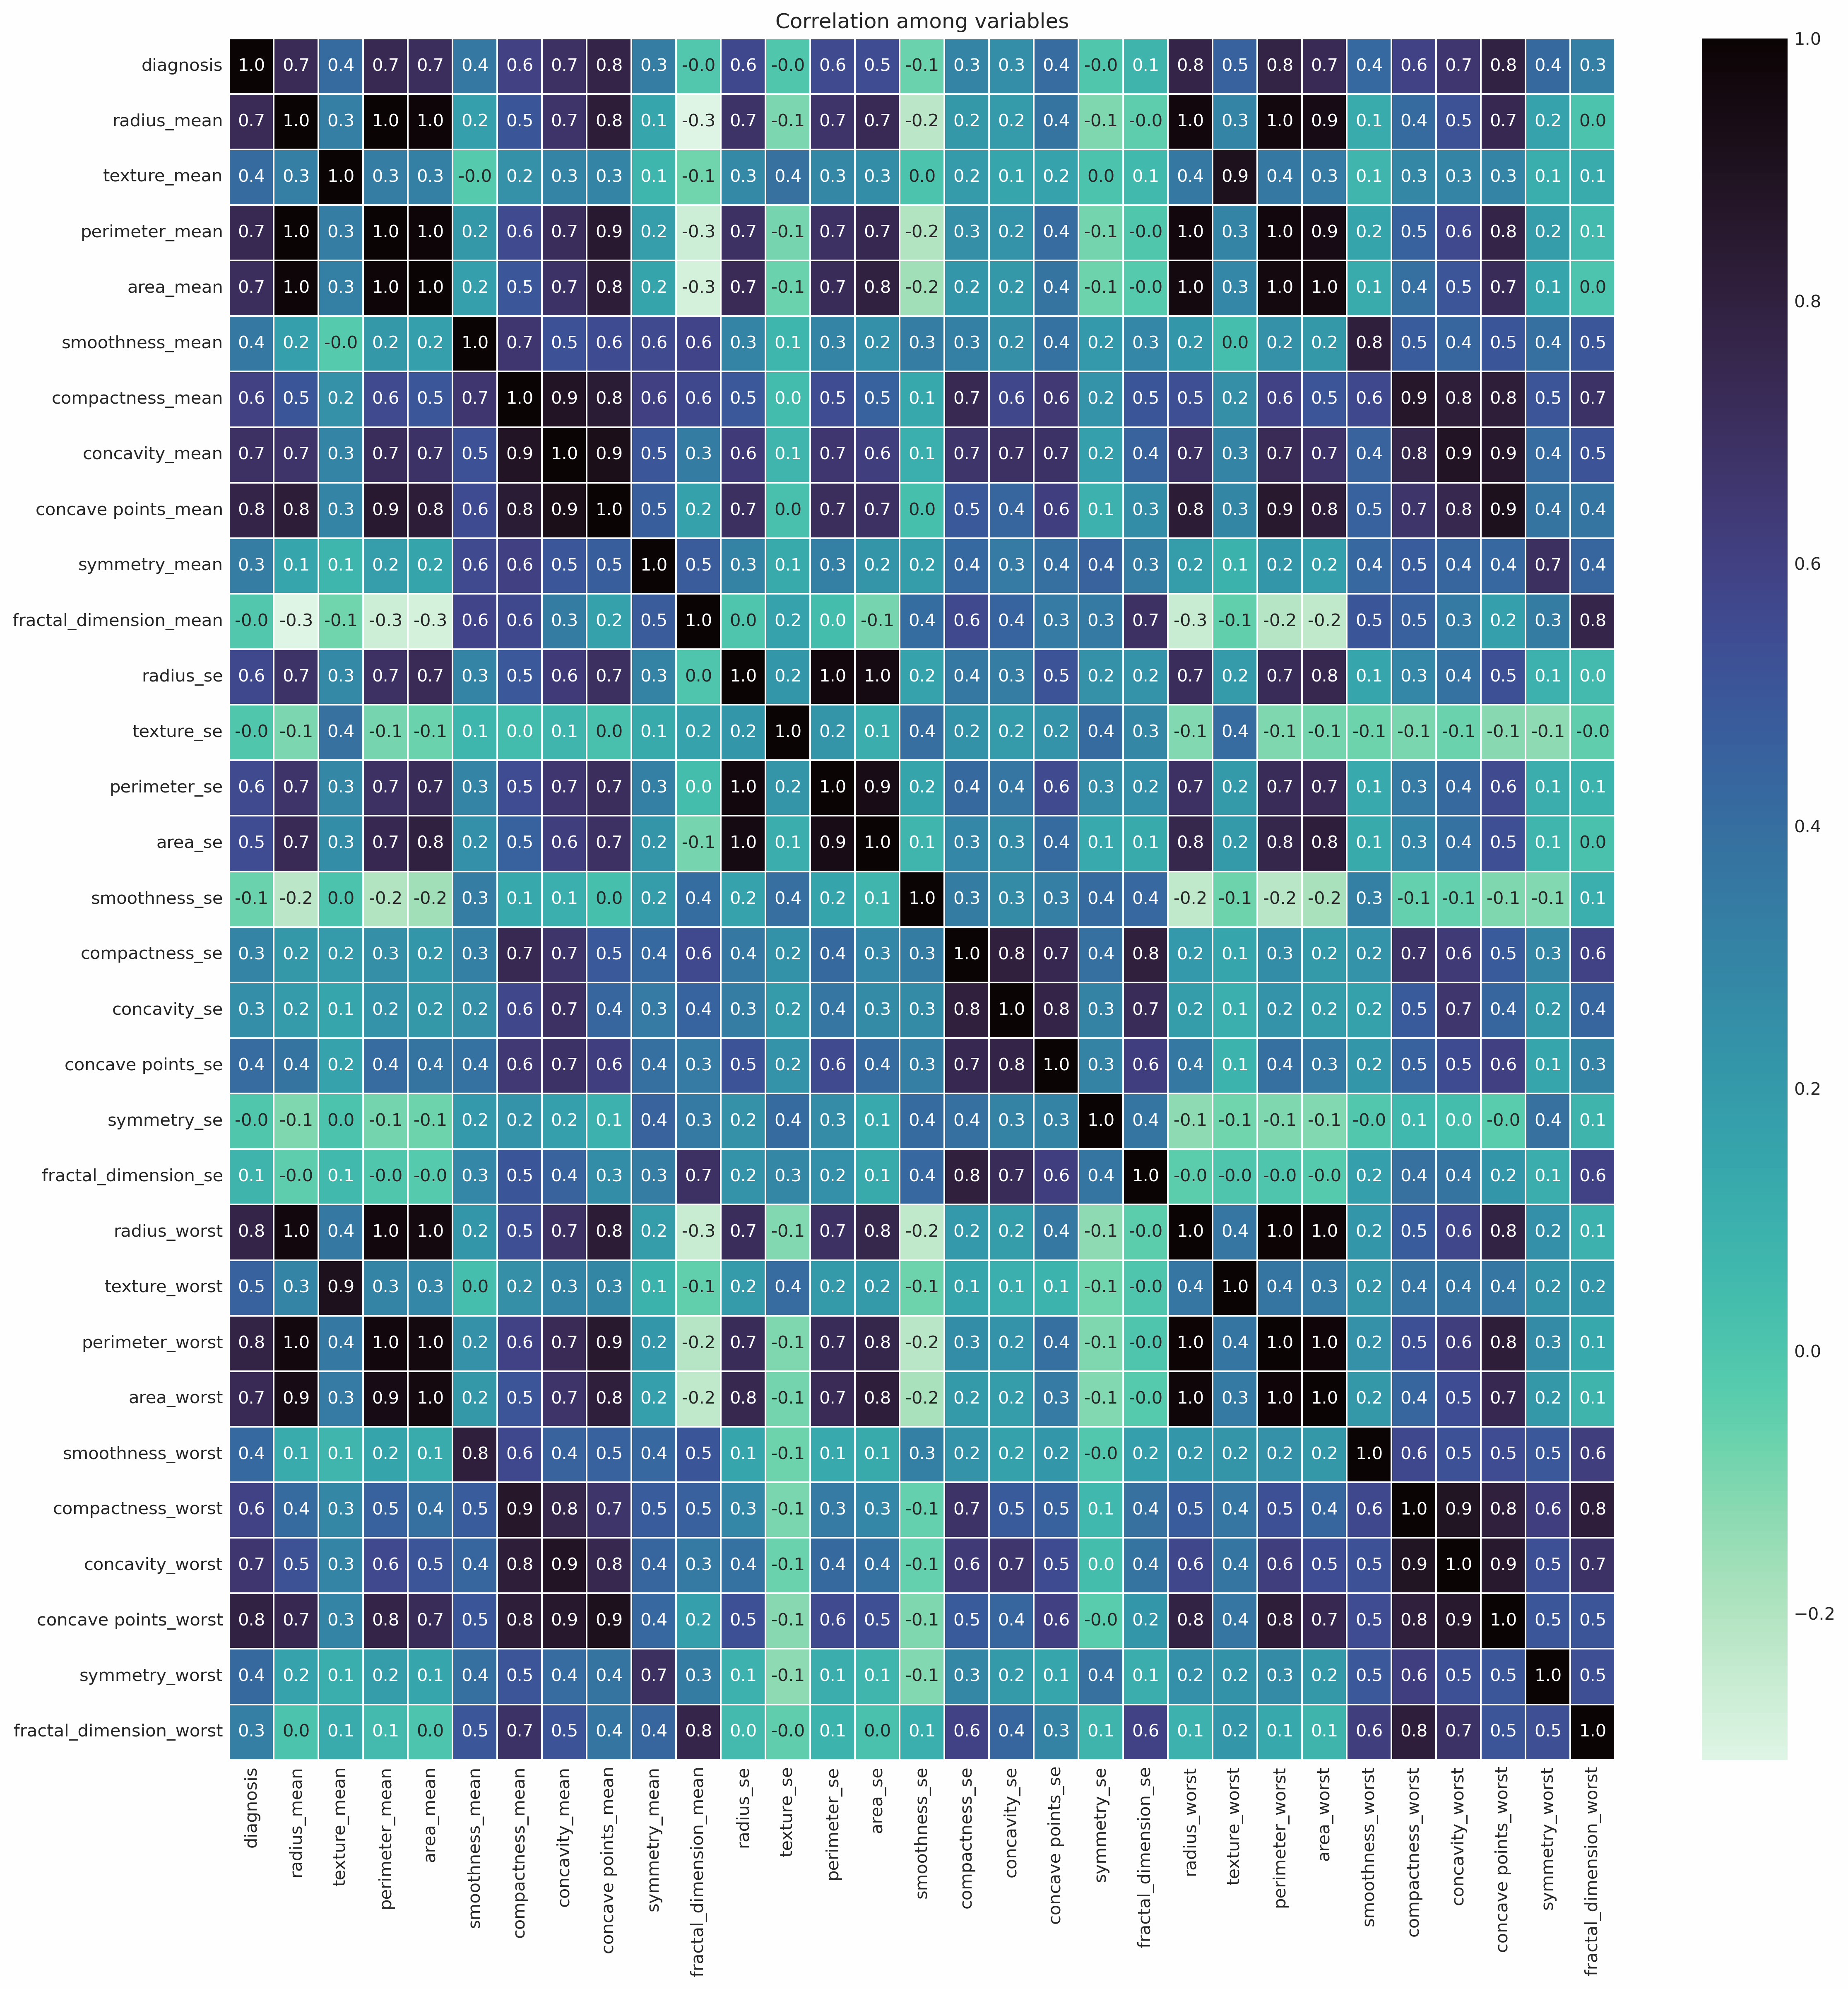

In [25]:
# compute the correlation matrix
corr = df.corr()
plt.figure(figsize=(18, 18), dpi=300)
# plot the correlation as a heatmap
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', cmap='mako_r')
plt.title('Correlation among variables')

Let's define which features have the highest correlation with "diagnosis" column.

In [26]:
# Select the top 10 features with the highest correlation with the "diagnosis" column
top10 = corr["diagnosis"].abs().nlargest(11)[1:]

# Print the top 10 features
top10

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

Based on the features with the highest correlation to "diagnosis":

* The **concave points (worst and mean)** have the highest correlation to the diagnosis, indicating that the presence of these features in the cells is a strong indicator of malignancy.
* The **perimeter and radius** (worst and mean) are also highly correlated, suggesting that the size and shape of the cells are important factors in determining malignancy.
* The **concavity** (mean and worst) and area (worst and mean) features also have a relatively high correlation with diagnosis, indicating that the irregularity and overall size of the cells may also be important indicators of malignancy. 

> These results suggest that a combination of size, shape, and irregularity features are the most important factors in determining whether a cell is malignant or benign.

Let's define these features as predictors for the model in the training phase: 

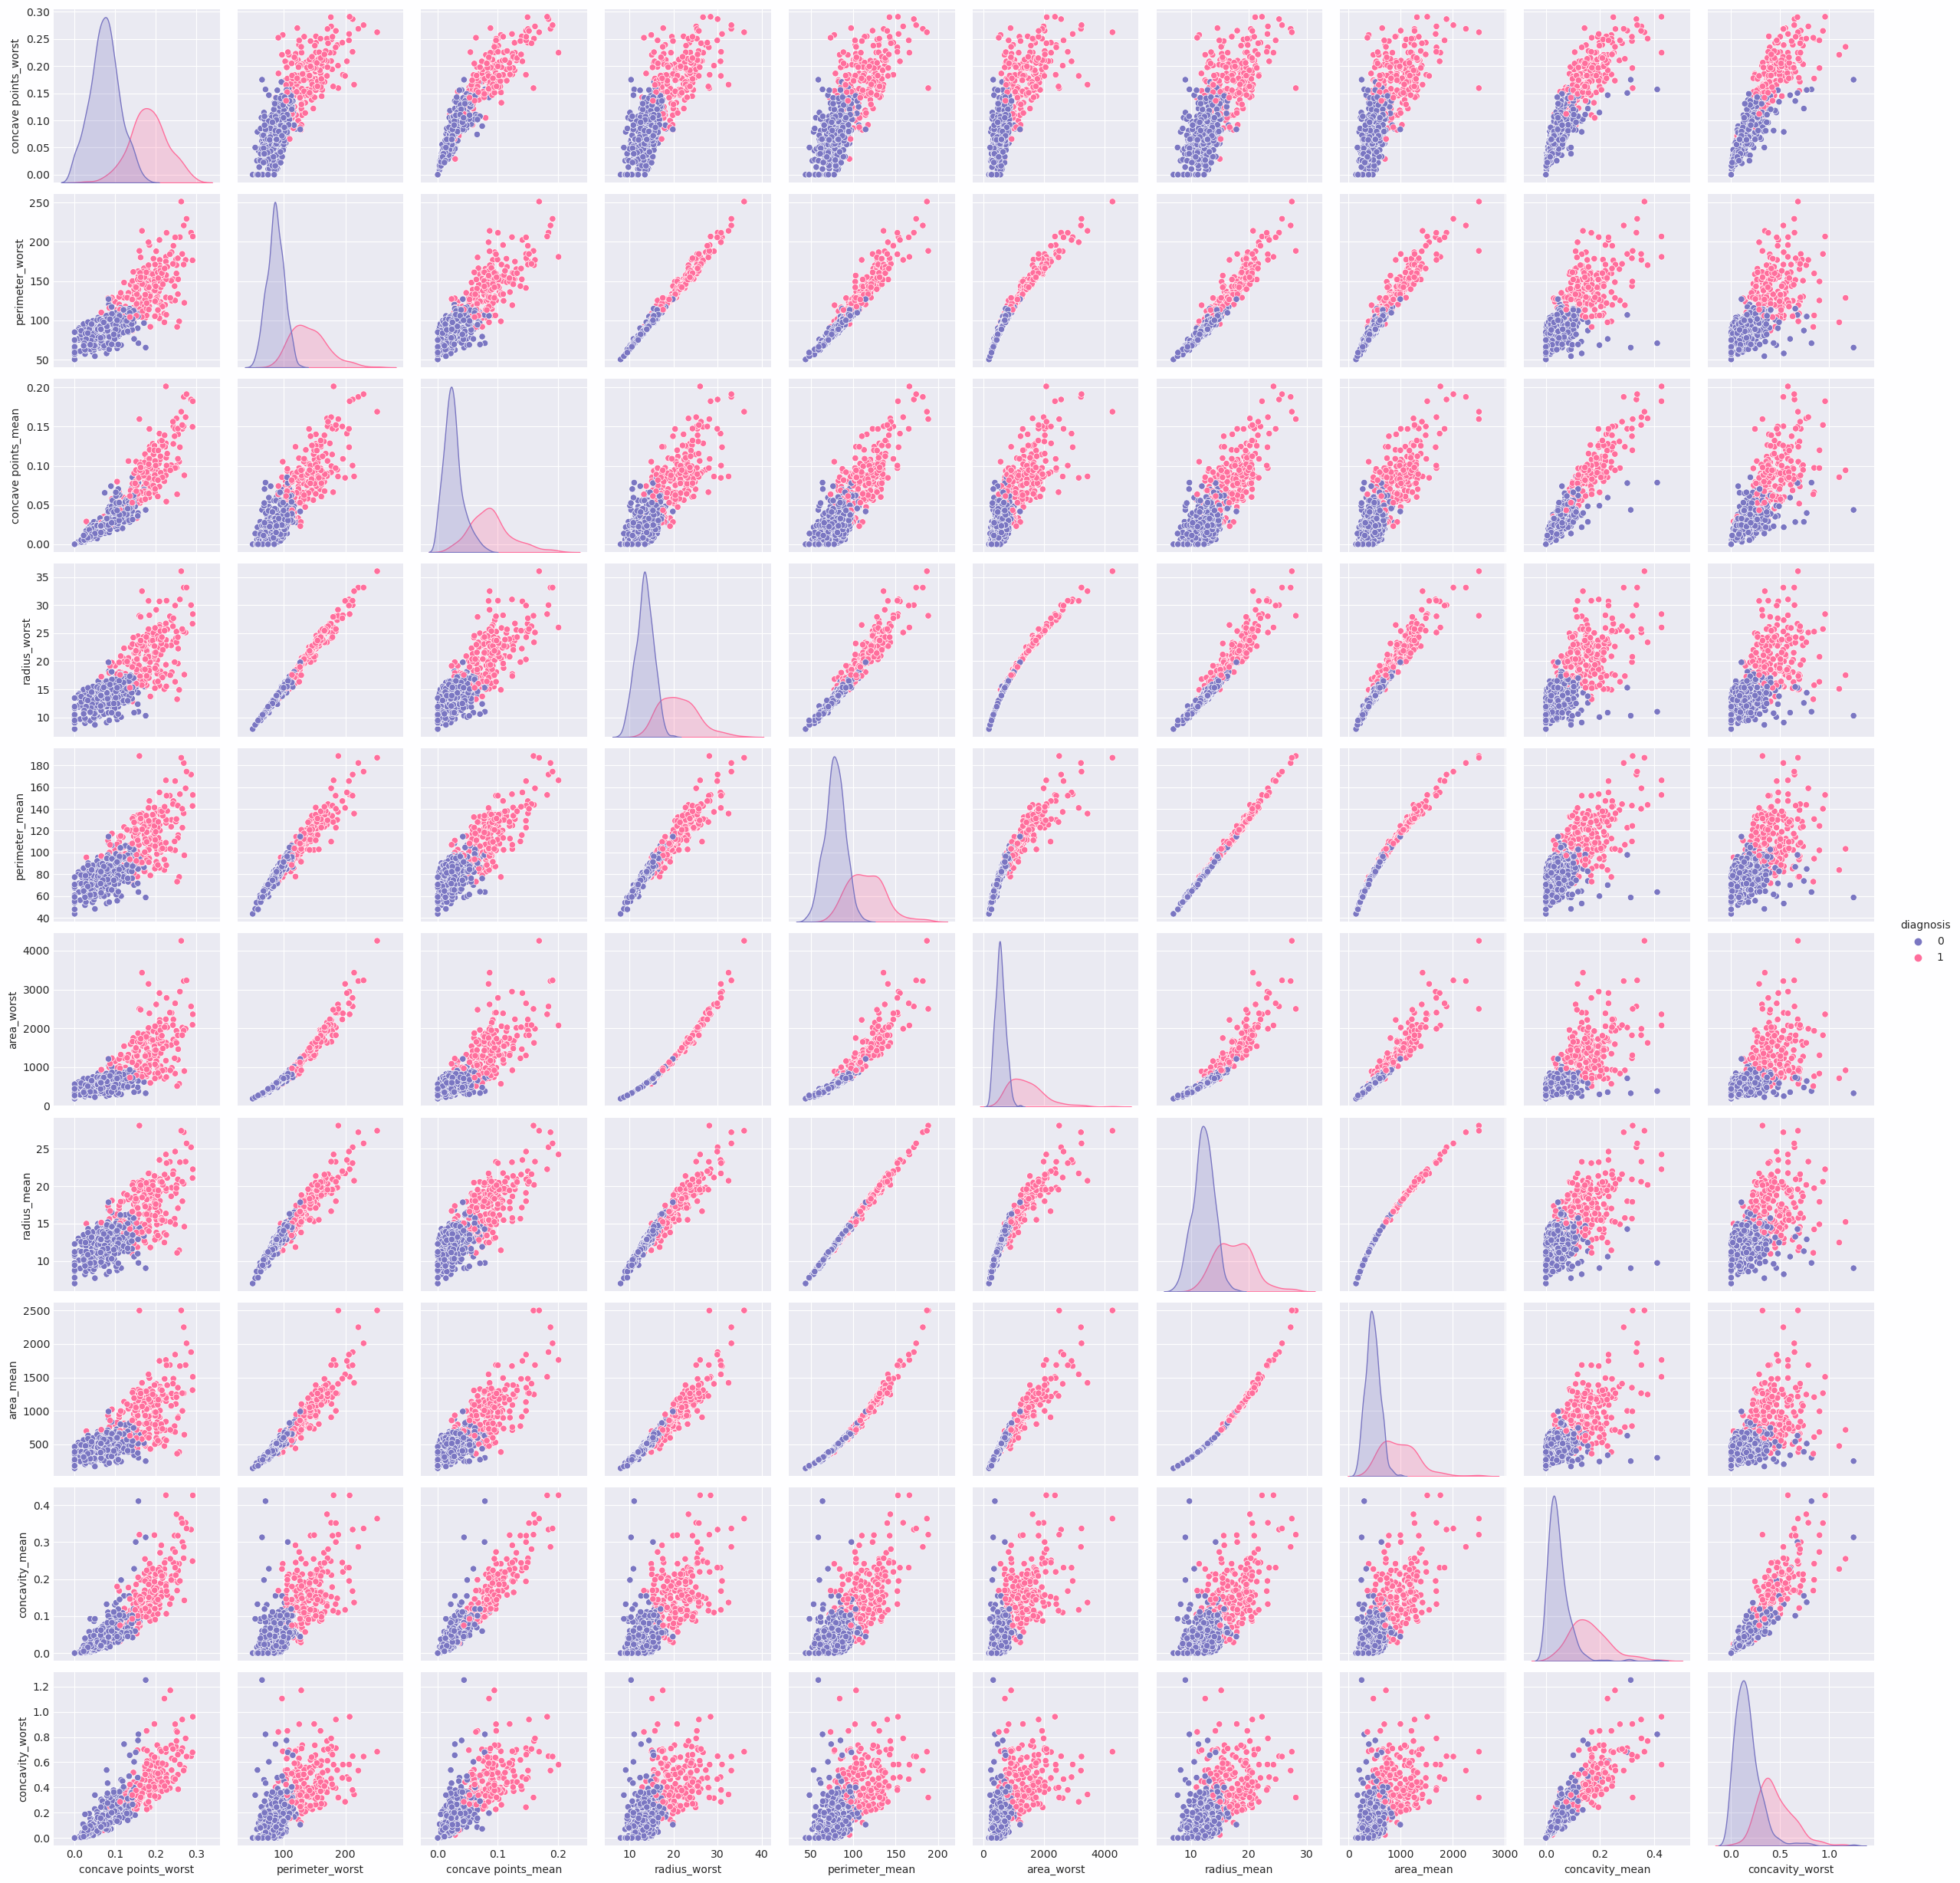

In [32]:
# Extract the correlation coefficients of each feature with "diagnosis"
corr_with_diagnosis = corr["diagnosis"].drop("diagnosis")

# Sort the correlation coefficients in descending order and get the top 10 features
top_10_features = corr_with_diagnosis.abs().sort_values(ascending=False)[:10].index.tolist()

# Visualization of these features
sns.pairplot(df, hue='diagnosis', vars=['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst'])

This visualization allows for a quick and easy way to identify patterns and potential clusters in the data, and to see how each feature contributes to the diagnosis. Overall, the scatter plots indicate that the selected features can effectively distinguish between malignant and benign tumors. For example, the scatter plot between "**concave points_worst**" and **"perimeter_worst**" shows a clear separation between malignant and benign tumors based on their values for these features.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;"> Solution to the problem: Training Models
    
</h3>
</div>

In this section of the notebook, we will focus on training models to predict the diagnosis of breast cancer. We will use the data that we have cleaned and explored in the previous sections and apply various machine learning algorithms to predict the target variable, which is the diagnosis of the breast cancer. The main **objective** of this section is to **find the model** that gives us the **best prediction accuracy**. The approach we will follow is:

> **First**: Each step will have their own preprocessing phase (cross-validation or train-test split) to prevent overfitting and create robust models. <br>
> **Second**: Apply various classification algorithms such as logistic regression, decision tree, random forest, and support vector machine (SVM) to the dataset. <br>
> **Third**: we will evaluate the performance of each algorithm using various metrics such as accuracy, precision, recall, and F1-score. <br>
> **Finally**: We will define a **winner**, the model with the **best accuracy**.

In [33]:
# defining the parameters
X = df[top_10_features]
y = df['diagnosis']

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> Logistic Regression Model
    
</h3>
</div>

In [101]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = pipe.predict(X_test)

# Evaluate the performance of the pipeline on the test data
score = pipe.score(X_test, y_test)
accuracy_LogisticRegresion = round(scores.mean(), 3)

print(f"Accuracy score: {score}")

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy score: 0.9649122807017544
Confusion Matrix: 
 [[104   4]
 [  2  61]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> Logistic Regression with Cross Validation
    
</h3>
</div>

The logistic regression model is implemented using the cross-validation approach. A pipeline is created that includes scaling the data using the standard scaler and then applying logistic regression on the scaled data. The pipeline is then passed to the cross_val_score function along with the dataset and the target variable, and the function performs 10-fold cross-validation to calculate the accuracy of the model. The average accuracy is printed out. The cross_val_predict function is used to calculate the precision, recall, and F1-score for the last fold of the cross-validation. These metrics help evaluate the model's performance.

In [100]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Perform 10-fold cross-validation
scores = cross_val_score(pipe, X, y, cv=10)

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")
accuracy_LogisticRegresionCV = round(scores.mean(), 3)

# Calculate precision, recall, and F1-score for the last fold
y_pred = cross_val_predict(pipe, X, y, cv=10)


precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Average accuracy: 0.9544
Precision score: 0.9387
Recall score: 0.9387
F1-score: 0.9387


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> Random Forest Classifier + CV
    
</h3>
</div>

Random Forest Classifier is a powerful ensemble learning algorithm that uses decision trees to classify data. In this approach, we use a pipeline that scales the features using StandardScaler and fits a Random Forest Classifier model with 200 trees. We then perform 10-fold cross-validation to evaluate the performance of the model, using the average accuracy score as the metric. Finally, we calculate the precision, recall, and F1-score for the last fold to evaluate the model's performance further. This approach is useful in identifying the most significant features in the dataset and predicting the class of the test data with high accuracy.

In [57]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

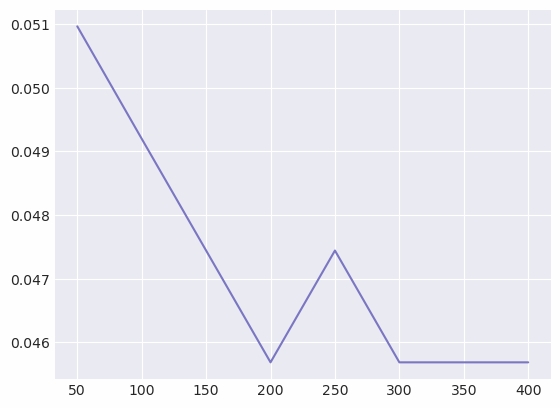

In [58]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)   
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [99]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Perform 10-fold cross-validation
scores = cross_val_score(pipe, X, y, cv=10)

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")
accuracy_RandomForest = round(scores.mean(), 3)

# Calculate precision, recall, and F1-score for the last fold
y_pred = cross_val_predict(pipe, X, y, cv=10)

# Evaluating performance of the model
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Average accuracy: 0.9456
Precision score: 0.9330
Recall score: 0.9198
F1-score: 0.9264



<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> KNeighbors Classifier + CV
    
</h3>
</div>

Random Forest Classifier is another powerful ensemble learning algorithm that uses decision trees to classify data. In this approach, we use a pipeline that scales the features using StandardScaler and fits a K-Nearest Neighbors (KNN) Classifier model with 7 neighbors. We then perform 10-fold cross-validation to evaluate the performance of the model, using the average accuracy score as the metric. Finally, we calculate the precision, recall, and F1-score for the last fold to evaluate the model's performance further. This approach is useful in identifying the most significant features in the dataset and predicting the class of the test data with high accuracy.

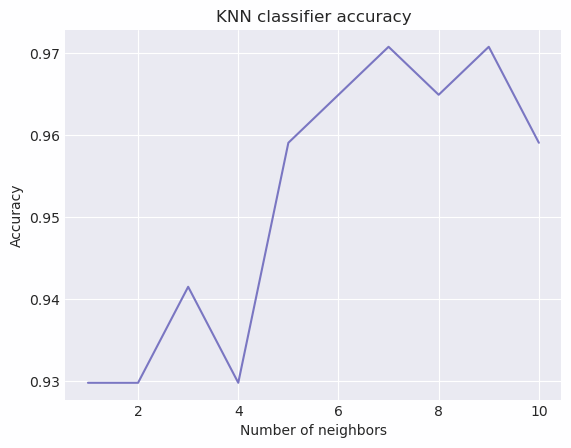

In [60]:
# Define the range of neighbors to test
neighbors = np.arange(1, 11)

# Train a KNN classifier for each number of neighbors and store the accuracy
accuracies = []
for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    accuracies.append(clf.score(X_test, y_test))

# Plot the accuracy as a function of the number of neighbors
plt.plot(neighbors, accuracies)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN classifier accuracy')
plt.show()

In [105]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=7))
])

# Perform 10-fold cross-validation
scores = cross_val_score(pipe, X, y, cv=10)

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")
accuracy_KNN = round(scores.mean(), 3)

# Calculate precision, recall, and F1-score for the last fold
y_pred = cross_val_predict(pipe, X, y, cv=10)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Average accuracy: 0.9385
Precision score: 0.9234
Recall score: 0.9104
F1-score: 0.9169



<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> XGBoost 
    
</h3>
</div>

XGBoost is a powerful gradient boosting framework that uses decision trees to classify data. In this approach, we split the data into training and testing sets and convert them into DMatrix format for XGBoost. We then set the XGBoost parameters such as the maximum depth, objective function, evaluation metric, learning rate, and the number of estimators. We train the XGBoost model using the training data and make predictions on the testing data. We evaluate the model performance on the testing data using the accuracy score as the metric and calculate the confusion matrix and classification report to further evaluate the model's performance. 

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the training and testing data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'max_depth': 3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = model.predict(dtest)
y_pred_binary = [int(pred > 0.5) for pred in y_pred]

# Evaluate the model performance on the testing data
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy_xgboost = round(accuracy, 3)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_binary))
print('\n')
print(classification_report(y_test, y_pred_binary))

[18:28:37] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy: 0.9591
Confusion Matrix: 
 [[106   2]
 [  5  58]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #D2F7FF;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> Support Vector Machine Classifier + CV
    
</h3>
</div>

In this approach, we use a pipeline that scales the features using StandardScaler and fits a Support Vector Machine (SVM) Classifier model with the radial basis function (RBF) kernel and auto gamma. We then perform 10-fold cross-validation to evaluate the performance of the model, using the average accuracy score as the metric. Finally, we calculate the precision, recall, and F1-score for the last fold to evaluate the model's performance further. This approach is useful in identifying the most significant features in the dataset and predicting the class of the test data with high accuracy.

In [93]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', gamma='auto'))
])

# Perform 10-fold cross-validation
scores = cross_val_score(pipe, X, y, cv=10)

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")
accuracy_svm = round(scores.mean(), 3)
    
# Calculate precision, recall, and F1-score for the last fold
y_pred = cross_val_predict(pipe, X, y, cv=10)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Average accuracy: 0.9438
Precision score: 0.9545
Recall score: 0.8915
F1-score: 0.9220


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #00203FFF;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Final Results
    
</h2>
</div>

The accuracy of LogisticRegression is:  0.954
The accuracy of LogisticRegression + CV is:  0.954
The accuracy of RandomForests is:  0.946
The accuracy of KNN is:  0.939
The accuracy of XGBoost is:  0.959
The accuracy of SVM is:  0.944


<AxesSubplot:>

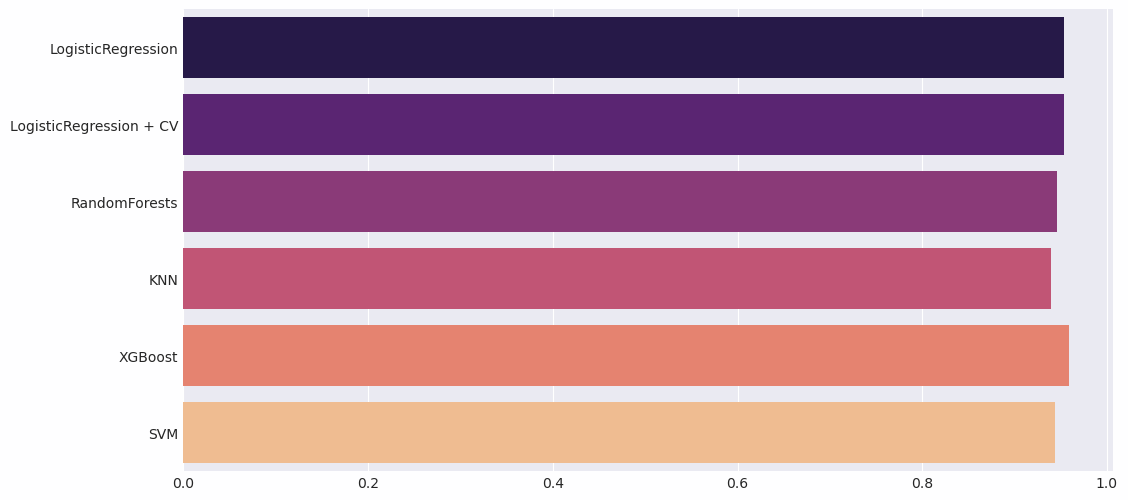

In [115]:
plt.figure(figsize=(12,6))
accuracies = [accuracy_LogisticRegresion, accuracy_LogisticRegresionCV,accuracy_RandomForest,accuracy_KNN,accuracy_xgboost,accuracy_svm]
model_name = ['LogisticRegression', 'LogisticRegression + CV','RandomForests','KNN','XGBoost','SVM']
for model, accuracy in zip(model_name, accuracies):
    print("The accuracy of", model, "is: ", accuracy)
sns.barplot(x= accuracies, y=model_name, palette='magma')

Based on the provided results, we can see that all of the models have performed relatively well in terms of accuracy.

> The **LogisticRegression model** achieved an accuracy of **0.954**, which is quite high. The addition of cross-validation did not have a significant impact on the accuracy, as the accuracy of the LogisticRegression + CV model was also 0.954.<br>
The **RandomForests model** achieved an accuracy of **0.946,** which is slightly lower than the LogisticRegression model, but still relatively high.<br>
The **KNN model** achieved an accuracy of **0.939,** which is slightly lower than the RandomForests model.<br>
The **XGBoost model** achieved the highest accuracy of **0.959,** indicating that it performed better than the other models in this particular dataset. <br>
>Finally, the **SVM model** achieved an accuracy of **0.944,** which is slightly lower than the RandomForests model, but still relatively high.

Overall, we can conclude that the **XGBoost model performed the best in terms of accuracy for this particular dataset**, followed by the LogisticRegression and SVM models.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #90EE90;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:black;"> Winner🏆: XGBoost Model with 95.9% of accuracy
    
</h3>
</div>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: #00203FFF;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Summary and Next Steps
    
</h2>
</div>

In this project, **we aimed to build a classification model to predict whether a patient has malignant or benign breast cancer**. 
>   1. We started by exploring and cleaning the dataset. <br> 2. Then performed feature selection using correlations to identify the most relevant features for the model. <br> 3. We then trained and evaluated five different models: Logistic Regression, Random Forest Classifier, K-Nearest Neighbors, XGBoost, and Support Vector Machine. <br> 4. We used cross-validation to evaluate each model's performance, and found that **XGBoost had the highest accuracy at 0.959**, followed by Logistic Regression and SVM with 0.954 and 0.944 accuracy respectively. <br> 5. We also calculated precision, recall, and F1-score to evaluate the models' performance further. 

Overall, this project demonstrates how machine learning can be used to build accurate classification models for breast cancer diagnosis, which can potentially aid in early detection and treatment of the disease.

### **Next Steps**:
* **Feature engineering**: Investigate whether additional features can be created from the existing data to improve the performance of the models. For example, one could explore creating interaction terms or combining existing features in different ways.

* **Hyperparameter tuning**: Optimize the hyperparameters of the models to improve their performance. This could involve using more advanced methods such as grid search, random search, or Bayesian optimization.

* **Model ensembling**: Combine the predictions of different models to improve the overall accuracy of the predictions. This could involve using simple techniques such as majority voting or more advanced methods such as stacking or blending.

* **Deployment**: If the models are accurate enough for practical use, deploy them to a production environment. This could involve integrating the models into a larger software system, such as AWS or Google Cloud.